In [122]:
import pandas as pd


# Overview of the data set

Displaying the first few rows of data collected from Zillow website.

In [123]:
df.head()

,Unnamed: 0,zpid,city,state,homeStatus,bedrooms,bathrooms,price,resoFacts_pricePerSquareFoot,yearBuilt,...,lotAreaUnits,streetAddress,zipcode,regionString,homeType,attributionInfo_agentEmail,attributionInfo_agentName,attributionInfo_agentPhoneNumber,attributionInfo_brokerName,attributionInfo_brokerPhoneNumber
0,0,2103708987,Belmont,CA,FOR_SALE,NaN,NaN,135000,NaN,NaN,...,Acres,0 Alhambra Dr,94002,Belmont CA 94002,LOT,maxtherealtor@gmail.com,Max Reinhardt,415-860-1484,Berkshire Hathaway HomeServices DrysdaleProper...,650-393-5108
1,1,2103537912,Belmont,CA,FOR_SALE,NaN,NaN,375000,NaN,NaN,...,Acres,0 Bartlett Way,94002,Belmont CA 94002,LOT,maxtherealtor@gmail.com,Max Reinhardt,415-860-1484,Berkshire Hathaway HomeServices DrysdaleProper...,650-393-5108
2,2,2061329361,San Lorenzo,CA,FOR_SALE,NaN,NaN,2700000,NaN,NaN,...,Acres,0 Foothill Blvd,94580,San Lorenzo CA 94580,LOT,ngocanh.nguyen@kkhomes.net,Anh Nguyen,408-839-4708,K&K Homes Realty,408-599-3401
3,3,2068613908,Redwood City,CA,FOR_SALE,NaN,NaN,376500,NaN,NaN,...,Acres,0 Huckleberry Trl,94062,Redwood City CA 94062,LOT,holly.moffitt.2020@gmail.com,Holly Moffitt,916-626-0015,Capitol Realty Center Inc.,916-224-1748
4,4,2106483047,La Honda,CA,FOR_SALE,0.0,0.0,349999,NaN,NaN,...,Acres,0 La Honda Rd,94020,La Honda CA 94020,LOT,NaN,Denis Hann,445-208-5585,Hann Realty,747-248-6618


Identifying the numeric and non-numeric columns

In [124]:
numeric_cols = df.select_dtypes(include=['number']).columns
print(numeric_cols)

non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)

Index(['Unnamed: 0', 'zpid', 'bedrooms', 'bathrooms', 'price',
       'resoFacts_pricePerSquareFoot', 'yearBuilt', 'lotSize', 'rentZestimate',
       'zestimate', 'zipcode'],
      dtype='object')
Index(['city', 'state', 'homeStatus', 'resoFacts_appliances', 'lotAreaUnits',
       'streetAddress', 'regionString', 'homeType',
       'attributionInfo_agentEmail', 'attributionInfo_agentName',
       'attributionInfo_agentPhoneNumber', 'attributionInfo_brokerName',
       'attributionInfo_brokerPhoneNumber'],
      dtype='object')


# Missing data

Missing data or missing values are when there’s no data value stored for a column in a row. It is very important to find missing data and handle it because the machine learning models that we will be using for data visualization won't work well if ther is missing data.



# Showing Missing data using histogram

Missing data histogram is a technique for summarizing information by rows.

<AxesSubplot:>

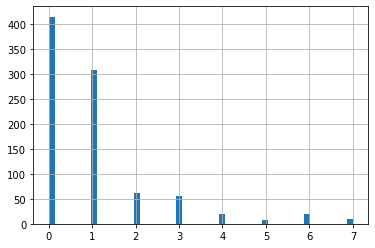

In [125]:
missing_by_row = df.isna().sum(axis='columns')
missing_by_row.hist(bins=50)

From the above histogram we can see that more than 400 rows have no missing values where as almost 300 rows have 1 missing values.

# Dealing with missing data

impute the missing with constant values

Instead of dropping data, we can also replace the missing. An easy method is to impute the missing or null data with zero.



In [126]:
df['bedrooms'] = df['bedrooms'].fillna(0)
df['bathrooms'] = df['bathrooms'].fillna(0)
df['lotSize'] = df['lotSize'].fillna(0)


In [127]:
num_missing_copy = df.isna().sum()
num_missing_copy


Unnamed: 0                             0
zpid                                   0
city                                   0
state                                  0
homeStatus                             0
bedrooms                               0
bathrooms                              0
price                                  0
resoFacts_pricePerSquareFoot          38
yearBuilt                             41
lotSize                                0
rentZestimate                         99
zestimate                            145
resoFacts_appliances                 180
lotAreaUnits                           0
streetAddress                          0
zipcode                                0
regionString                           0
homeType                               0
attributionInfo_agentEmail             4
attributionInfo_agentName              1
attributionInfo_agentPhoneNumber     192
attributionInfo_brokerName             0
attributionInfo_brokerPhoneNumber      7
dtype: int64

# Irregular data (outliers)

Outliers are data that is distinct from other observations. They could bias our data analysis results, providing a misleading representation of the data. Outliers could be real outliers or mistakes.

histogram & box plot
Let’s use the data visualization method to detect outliers. We’ll plot a histogram and a box plot of the column life_sq.


In [128]:
import plotly.express as px

fig = px.box(df, x=df['price'])
fig.show()


In [129]:
import numpy as np


In [130]:
fig = px.box(df, x=df['price'])
fig.show()

In [131]:
import numpy as np


In [132]:
fig = px.box(df, x=df['price'])
fig.show()

In [133]:
import numpy as np
df = df[np.abs(df['price'] - df['price'].mean()) <= (2 * df['price'].std())]

In [134]:
fig = px.box(df, x=df['price'])
fig.show()

In [135]:
df

,Unnamed: 0,zpid,city,state,homeStatus,bedrooms,bathrooms,price,resoFacts_pricePerSquareFoot,yearBuilt,...,lotAreaUnits,streetAddress,zipcode,regionString,homeType,attributionInfo_agentEmail,attributionInfo_agentName,attributionInfo_agentPhoneNumber,attributionInfo_brokerName,attributionInfo_brokerPhoneNumber
0,0,2103708987,Belmont,CA,FOR_SALE,0.0,0.0,135000,NaN,NaN,...,Acres,0 Alhambra Dr,94002,Belmont CA 94002,LOT,maxtherealtor@gmail.com,Max Reinhardt,415-860-1484,Berkshire Hathaway HomeServices DrysdaleProper...,650-393-5108
1,1,2103537912,Belmont,CA,FOR_SALE,0.0,0.0,375000,NaN,NaN,...,Acres,0 Bartlett Way,94002,Belmont CA 94002,LOT,maxtherealtor@gmail.com,Max Reinhardt,415-860-1484,Berkshire Hathaway HomeServices DrysdaleProper...,650-393-5108
2,2,2061329361,San Lorenzo,CA,FOR_SALE,0.0,0.0,2700000,NaN,NaN,...,Acres,0 Foothill Blvd,94580,San Lorenzo CA 94580,LOT,ngocanh.nguyen@kkhomes.net,Anh Nguyen,408-839-4708,K&K Homes Realty,408-599-3401
3,3,2068613908,Redwood City,CA,FOR_SALE,0.0,0.0,376500,NaN,NaN,...,Acres,0 Huckleberry Trl,94062,Redwood City CA 94062,LOT,holly.moffitt.2020@gmail.com,Holly Moffitt,916-626-0015,Capitol Realty Center Inc.,916-224-1748
4,4,2106483047,La Honda,CA,FOR_SALE,0.0,0.0,349999,NaN,NaN,...,Acres,0 La Honda Rd,94020,La Honda CA 94020,LOT,NaN,Denis Hann,445-208-5585,Hann Realty,747-248-6618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,890,2061777143,Redwood City,CA,FOR_SALE,0.0,0.0,399000,NaN,NaN,...,Acres,Comstock Old Comstock Rd,94062,Redwood City CA 94062,LOT,jwachter@cbnorcal.com,Joan Wachter,650-558-6895,Coldwell Banker Realty,650-558-4200
891,891,18553197,Concord,CA,FOR_SALE,1.0,1.0,105000,219.0,NaN,...,sqft,(Undisclosed Address),94520,Concord CA 94520,MANUFACTURED,rosavenegas752@yahoo.com,Rosa Maria Venegas,NaN,"HomeSmart Optima Realty, Inc",925-270-0520
893,893,2117480198,South San Francisco,CA,FOR_SALE,3.0,2.0,1195000,872.0,1952.0,...,Square Feet,Lilac Ln,94080,South San Francisco CA 94080,SINGLE_FAMILY,garciaresales@gmail.com,Ana Garcia-Alvarado,650-333-3350,eXp Realty of California Inc,888-584-9427
894,894,2062183466,South San Francisco,CA,FOR_SALE,3.0,3.0,1350000,692.0,1997.0,...,Square Feet,Northcrest Dr #25,94080,South San Francisco CA 94080,TOWNHOUSE,linda8linda@gmail.com,Linda Whipple,650-740-4325,Homes of Faith,650-576-3896


In [136]:
df_sorted = df.sort_values('city')
df = df_sorted
df

,Unnamed: 0,zpid,city,state,homeStatus,bedrooms,bathrooms,price,resoFacts_pricePerSquareFoot,yearBuilt,...,lotAreaUnits,streetAddress,zipcode,regionString,homeType,attributionInfo_agentEmail,attributionInfo_agentName,attributionInfo_agentPhoneNumber,attributionInfo_brokerName,attributionInfo_brokerPhoneNumber
619,619,2061968146,Albany,CA,FOR_SALE,1.0,1.0,520000,743.0,1978.0,...,Acres,409 Evelyn Ave #108,94706,Albany CA 94706,CONDO,tpoperealestate@gmail.com,Thomas A Pope,707-410-7818,"Pope Real Estate, Inc",707-425-2121
621,621,2062248603,Albany,CA,FOR_SALE,1.0,1.0,500000,833.0,1978.0,...,Acres,409 Evelyn Ave #301,94706,Albany CA 94706,CONDO,tpoperealestate@gmail.com,Thomas A Pope,707-410-7818,"Pope Real Estate, Inc",707-425-2121
622,622,2061968144,Albany,CA,FOR_SALE,2.0,1.0,575000,673.0,1978.0,...,Acres,409 Evelyn Ave #304,94706,Albany CA 94706,CONDO,tpoperealestate@gmail.com,Thomas A Pope,707-410-7818,"Pope Real Estate, Inc",707-425-2121
623,623,2062248601,Albany,CA,FOR_SALE,2.0,2.0,650000,650.0,1978.0,...,Acres,409 Evelyn Ave #305,94706,Albany CA 94706,CONDO,tpoperealestate@gmail.com,Thomas A Pope,707-410-7818,"Pope Real Estate, Inc",707-425-2121
624,624,2062248604,Albany,CA,FOR_SALE,1.0,1.0,520000,743.0,1978.0,...,Acres,409 Evelyn Ave #308,94706,Albany CA 94706,CONDO,tpoperealestate@gmail.com,Thomas A Pope,707-410-7818,"Pope Real Estate, Inc",707-425-2121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,171,15597312,Woodside,CA,FOR_SALE,0.0,0.0,1950000,NaN,NaN,...,Acres,14051 Skyline Blvd,94062,Woodside CA 94062,LOT,scott@scottdancer.com,Scott Dancer,650-888-8199,Compass,650-529-1111
571,571,181464708,Woodside,CA,FOR_SALE,0.0,0.0,695000,NaN,NaN,...,Acres,3600 Partition Rd,94062,Woodside CA 94062,LOT,scott@scottdancer.com,Scott Dancer,650-888-8199,Compass,650-529-1111
181,181,15589374,Woodside,CA,FOR_SALE,3.0,3.0,1495000,686.0,1945.0,...,Acres,144 Huckleberry Trl,94062,Woodside CA 94062,SINGLE_FAMILY,homes@margotlockwood.com,Margot Lockwood,650-400-2528,Golden Gate Sotheby's International Realty,650-847-1141
242,242,15589328,Woodside,CA,FOR_SALE,4.0,4.0,2398000,769.0,1974.0,...,Acres,165 Old Ranch Rd,94062,Woodside CA 94062,SINGLE_FAMILY,scott@scottphayes.com,Scott Hayes,650-245-5044,Compass,650-529-1111


In [137]:
df.to_excel('C:\\Users\\STSC\\Downloads\\Cleaned Data.xlsx')